In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prices = pd.read_csv('prices_1adult.csv')
prices.head()

,Unnamed: 0,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30
0,5footway.inn Project Chinatown,22,27,27,27,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,[]
1,AMOY by Far East Hospitality (SG Clean Certified),231,257,257,[],[],[],[],231,244,...,252,252,255,244,244,244,NaN,[],[],[]
2,Adler Hostel,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],35
3,"Aerotel Transit Hotel, Terminal 1",[],247,[],247,[],[],[],[],[],...,[],[],[],[],247,[],[],[],[],[]
4,Aliwal Park Hotel,67,62,61,62,62,66,59,59,55,...,59,59,55,55,55,55,NaN,59,59,55


In [31]:
# Day Information
day = []
for i in range(1,31):
    day.append(str(i) + ' November' + ' 2020')
day1 = []
for i in range(1,31):
    day1.append(str(i) + 'Nov')
day_name = pd.DataFrame(pd.to_datetime(day).day_name())

day_data = pd.DataFrame(pd.to_datetime(day).dayofweek)
day_data['Date'] = day1
day_data['Day'] = day_name
day_data.columns = ["Day of the week", "Date", "Day"]
day_data.head()

,Day of the week,Date,Day
0,6,1Nov,Sunday
1,0,2Nov,Monday
2,1,3Nov,Tuesday
3,2,4Nov,Wednesday
4,3,5Nov,Thursday


In [32]:
# Finding lowest price for each hotel in each month
prices = prices.replace("[]", np.nan)

In [33]:
for i in range(len(prices)):
    for j in range(1, len(prices.columns)):
        if type(prices.iloc[i,j]) != str:
            continue
        elif len(prices.iloc[i,j]) <= 4:
            prices.iloc[i,j] = prices.iloc[i,j]
        else:
            prices.iloc[i,j] = prices.iloc[i,j].split(",")[0] + prices.iloc[i,j].split(",")[1]
prices.head()

,Unnamed: 0,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30
0,5footway.inn Project Chinatown,22,27,27,27,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,NaN
1,AMOY by Far East Hospitality (SG Clean Certified),231,257,257,NaN,NaN,NaN,NaN,231,244,...,252,252,255,244,244,244,NaN,NaN,NaN,NaN
2,Adler Hostel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
3,"Aerotel Transit Hotel, Terminal 1",NaN,247,NaN,247,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247,NaN,NaN,NaN,NaN,NaN
4,Aliwal Park Hotel,67,62,61,62,62,66,59,59,55,...,59,59,55,55,55,55,NaN,59,59,55


In [34]:
for i in range(len(prices)):
    prices.iloc[i, 1:] = pd.to_numeric(prices.iloc[i,1:])

In [35]:
prices["Lowest Price"] = np.nan
for i in range(len(prices)):
    prices["Lowest Price"][i] = prices.iloc[i,1:].min(axis=0)
prices.head()

<ipython-input-35-3ffce202f286>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["Lowest Price"][i] = prices.iloc[i,1:].min(axis=0)


,Unnamed: 0,2020-11-01,2020-11-02,2020-11-03,2020-11-04,2020-11-05,2020-11-06,2020-11-07,2020-11-08,2020-11-09,...,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30,Lowest Price
0,5footway.inn Project Chinatown,22,27,27,27,22,22,22,22,22,...,22,22,22,22,22,22,22,22,NaN,22.0
1,AMOY by Far East Hospitality (SG Clean Certified),231,257,257,NaN,NaN,NaN,NaN,231,244,...,252,255,244,244,244,NaN,NaN,NaN,NaN,231.0
2,Adler Hostel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,35.0
3,"Aerotel Transit Hotel, Terminal 1",NaN,247,NaN,247,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,247,NaN,NaN,NaN,NaN,NaN,247.0
4,Aliwal Park Hotel,67,62,61,62,62,66,59,59,55,...,59,55,55,55,55,NaN,59,59,55,55.0


In [36]:
prices_1 = prices.copy()
for i in range(len(prices_1)):
    for j in range(1, len(prices_1.columns)-1):
        if prices_1.iloc[i,j] == prices_1.iloc[i,-1]:
            prices_1.iloc[i,j] = 1
        else:
            prices_1.iloc[i,j] = 0

In [37]:
prices_1 = prices_1.append(prices_1.iloc[:,1:-1].sum(), ignore_index=True)
lowest_price = prices_1.iloc[308,:-1]
lowest_price.reset_index
lowest_price = pd.DataFrame(lowest_price)
lowest_price.columns = ["Number of times lowest price occurred"]
lowest_price = lowest_price.iloc[1:,:]
lowest_price.head()

,Number of times lowest price occurred
2020-11-01,67
2020-11-02,112
2020-11-03,100
2020-11-04,92
2020-11-05,80


In [38]:
lowest_price["Day"] = "Sunday"
for i in range(len(lowest_price)):
    lowest_price["Day"][i] = str(day_data["Day"][i])
    lowest_price.iloc[i, 0] = pd.to_numeric(lowest_price.iloc[i,0])
lowest_price.head()

,Number of times lowest price occurred,Day
2020-11-01,67,Sunday
2020-11-02,112,Monday
2020-11-03,100,Tuesday
2020-11-04,92,Wednesday
2020-11-05,80,Thursday


In [39]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
days = lowest_price.groupby(["Day"]).sum()
days["Count"] = lowest_price.groupby(["Day"]).count()
days["Average number of times lowest price occurred"] = days["Number of times lowest price occurred"]/days["Count"]
days = days.loc[day_order]
days.head()

,Number of times lowest price occurred,Count,Average number of times lowest price occurred
Day,,,
Monday,468.0,5,93.60
Tuesday,388.0,4,97.00
Wednesday,346.0,4,86.50
Thursday,345.0,4,86.25
Friday,138.0,4,34.50


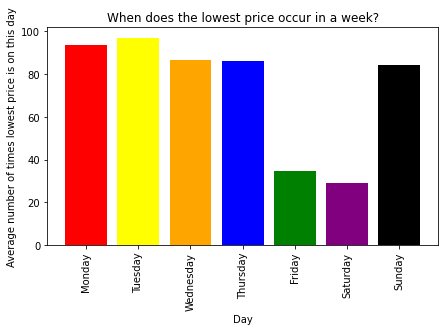

In [41]:
plt.figure(figsize = (7,4))

plt.bar(days.index, days["Average number of times lowest price occurred"], color=('red','yellow','orange','blue','green','purple','black'))

plt.title("When does the lowest price occur in a week?")

plt.xlabel("Day")
plt.xticks(rotation=90)

plt.ylabel("Average number of times lowest price is on this day")

plt.show()

In [132]:
property_type = pd.read_csv("final_df.csv")
property_type.head()

,Unnamed: 0,Name,Property Type,1Nov,2Nov,3Nov,4Nov,5Nov,6Nov,7Nov,...,24h Front Desk,Laundry Service,Bathtub,Balcony,Kitchen,TV,Internet,Air Conditioning,Ironing,Non-Smoking
0,0,M Social Singapore,Hotel,166,166,169.0,157.0,166,217,NaN,...,Y,Y,N,N,N,Y,Y,Y,Y,N
1,1,YOTEL Singapore Orchard Road (SG Clean Certified),Hotel,162,162,162.0,162.0,162,167,180,...,Y,Y,N,N,N,Y,Y,Y,Y,Y
2,2,Hotel G Singapore (SG Clean Certified),Hotel,99,99,99.0,99.0,97,113,117,...,Y,Y,N,N,N,Y,Y,Y,Y,Y
3,3,Resorts World Sentosa - Hotel Michael (SG Clea...,Resort,480,457,363.0,362.0,339,480,NaN,...,Y,Y,N,N,N,Y,Y,Y,Y,Y
4,4,Pan Pacific Serviced Suites Beach Road (SG Cle...,Serviced apartment,242,241,253.0,231.0,231,347,NaN,...,Y,Y,N,N,Y,N,Y,Y,N,N


In [133]:
property_type1 = property_type.iloc[:,1:33]
for i in range(len(property_type1)):
    for j in range(2, len(property_type1.columns)):
        if type(property_type1.iloc[i,j]) != str:
            continue
        elif len(property_type1.iloc[i,j]) <= 4:
            property_type1.iloc[i,j] = property_type1.iloc[i,j]
        else:
            property_type1.iloc[i,j] = property_type1.iloc[i,j].split(",")[0] + property_type1.iloc[i,j].split(",")[1]
property_type1.head()

,Name,Property Type,1Nov,2Nov,3Nov,4Nov,5Nov,6Nov,7Nov,8Nov,...,21Nov,22Nov,23Nov,24Nov,25Nov,26Nov,27Nov,28Nov,29Nov,30Nov
0,M Social Singapore,Hotel,166,166,169.0,157.0,166,217,NaN,169.0,...,184,179,179,169.0,166,166.0,189,184,166,169.0
1,YOTEL Singapore Orchard Road (SG Clean Certified),Hotel,162,162,162.0,162.0,162,167,180,162.0,...,169,160,160,156.0,156,156.0,161,169,157,156.0
2,Hotel G Singapore (SG Clean Certified),Hotel,99,99,99.0,99.0,97,113,117,99.0,...,NaN,99,99,99.0,99,99.0,113,117,98,99.0
3,Resorts World Sentosa - Hotel Michael (SG Clea...,Resort,480,457,363.0,362.0,339,480,NaN,598.0,...,NaN,539,504,457.0,457,457.0,539,692,480,457.0
4,Pan Pacific Serviced Suites Beach Road (SG Cle...,Serviced apartment,242,241,253.0,231.0,231,347,NaN,253.0,...,NaN,262,262,262.0,250,262.0,287,297,250,262.0


In [134]:
for i in range(len(property_type1)):
    property_type1.iloc[i, 2:] = pd.to_numeric(property_type1.iloc[i,2:])

In [135]:
property_type1["Sum of prices"] = property_type1.iloc[:,2:].sum(axis=1)
property_type1["Count"] = property_type1.iloc[:,2:-1].count(axis=1)
property_type1["Mean Price"] = property_type1["Sum of prices"]/property_type1["Count"]
property_type1.head()

,Name,Property Type,1Nov,2Nov,3Nov,4Nov,5Nov,6Nov,7Nov,8Nov,...,24Nov,25Nov,26Nov,27Nov,28Nov,29Nov,30Nov,Sum of prices,Count,Mean Price
0,M Social Singapore,Hotel,166,166,169.0,157.0,166,217,NaN,169.0,...,169.0,166,166.0,189,184,166,169.0,5091.0,29,175.551724
1,YOTEL Singapore Orchard Road (SG Clean Certified),Hotel,162,162,162.0,162.0,162,167,180,162.0,...,156.0,156,156.0,161,169,157,156.0,4844.0,30,161.466667
2,Hotel G Singapore (SG Clean Certified),Hotel,99,99,99.0,99.0,97,113,117,99.0,...,99.0,99,99.0,113,117,98,99.0,2975.0,29,102.586207
3,Resorts World Sentosa - Hotel Michael (SG Clea...,Resort,480,457,363.0,362.0,339,480,NaN,598.0,...,457.0,457,457.0,539,692,480,457.0,13448.0,28,480.285714
4,Pan Pacific Serviced Suites Beach Road (SG Cle...,Serviced apartment,242,241,253.0,231.0,231,347,NaN,253.0,...,262.0,250,262.0,287,297,250,262.0,7281.0,28,260.035714


In [138]:
property_type2 = property_type1.loc[:, ["Property Type", "Mean Price"]]
property_type2 = property_type2.groupby(["Property Type"]).mean()
property_type2.head()

,Mean Price
Property Type,
Boat/cruise,164.000000
Capsule hotel,57.681483
Entire apartment,275.272727
Hostel,29.015849
Hotel,170.942415


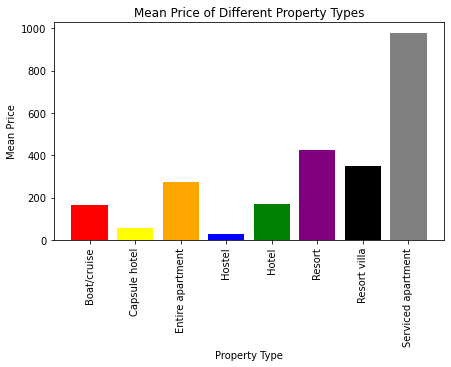

In [141]:
plt.figure(figsize = (7,4))

plt.bar(property_type2.index, property_type2["Mean Price"], color=('red','yellow','orange','blue','green','purple','black','grey'))

plt.title("Mean Price of Different Property Types")

plt.xlabel("Property Type")
plt.xticks(rotation=90)

plt.ylabel("Mean Price")

plt.show()